In [1]:
!pip install patchify

In [2]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [3]:
minmaxscaler = MinMaxScaler()

In [4]:
!ls -lah '/kaggle/input/dense-and-sparse/TUGAS AKHIR/label_as_png'

total 0
drwxr-xr-x 4 nobody nogroup 0 Mar  3 15:49  .
drwxr-xr-x 3 nobody nogroup 0 Mar  3 15:49  ..
drwxr-xr-x 4 nobody nogroup 0 Mar  3 15:49 'tile 1'
drwxr-xr-x 4 nobody nogroup 0 Mar  3 15:50 'tile 2'


In [5]:
dataset_name = "label_as_png"

In [6]:
dataset_root_folder = '/kaggle/input/dense-and-sparse/TUGAS AKHIR'

In [7]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'masks':
    images = os.listdir(path)
    print(path)
    #print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.png')):
        #print(image_name)
        a = True

/kaggle/input/dense-and-sparse/TUGAS AKHIR/label_as_png/tile 2/masks
/kaggle/input/dense-and-sparse/TUGAS AKHIR/label_as_png/tile 1/masks


In [8]:
image_patch_size = 128

In [9]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/tile 1/images/image_1.png',1)

In [10]:
image.shape

(807, 796, 3)

In [11]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [12]:
len(image_patches)

6

In [13]:
print(image_patches.shape)

(6, 6, 1, 128, 128, 3)


In [14]:
minmaxscaler = MinMaxScaler()

In [15]:
image_x = image_patches[0,0,:,:]
#MinMaxScaler
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [16]:
image_y[0].shape

(128, 128, 3)

In [17]:
print(type(image))

<class 'numpy.ndarray'>


In [18]:
print(image.shape)

(807, 796, 3)


In [19]:
try:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(image)
    print("Berhasil membuat PIL image:", type(pil_image))
except Exception as e:
    print("Error saat membuat PIL image:", e)

Berhasil membuat PIL image: <class 'PIL.Image.Image'>


In [20]:
image.shape

(807, 796, 3)

In [21]:
(image.shape[0]//image_patch_size)*image_patch_size

768

In [22]:
image_dataset = []
mask_dataset = []

for tile_id in range(1,2):
    # Proses images
    for image_id in range(1,1000):
        image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/tile {tile_id}/images/image_{image_id}.png',1)
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            size_x = (image.shape[1]//image_patch_size)*image_patch_size
            size_y = (image.shape[0]//image_patch_size)*image_patch_size

            image = Image.fromarray(image)
            image = image.crop((0,0, size_x, size_y))
            image = np.array(image)
            patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

            for i in range(patched_images.shape[0]):
                for j in range(patched_images.shape[1]):
                    individual_patched_image = patched_images[i,j,:,:]
                    individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
                    individual_patched_image = individual_patched_image[0]
                    image_dataset.append(individual_patched_image)

    # Proses masks dengan format nama file yang berbeda
    for image_id in range(1,1000):
        mask = cv2.imread(f'{dataset_root_folder}/{dataset_name}/tile {tile_id}/masks/label_image_{image_id}.png',1)  # Mengubah format nama file
        if mask is not None:
            size_x = (mask.shape[1]//image_patch_size)*image_patch_size
            size_y = (mask.shape[0]//image_patch_size)*image_patch_size

            mask = Image.fromarray(mask)
            mask = mask.crop((0,0, size_x, size_y))
            mask = np.array(mask)
            patched_masks = patchify(mask, (image_patch_size, image_patch_size, 3), step=image_patch_size)

            for i in range(patched_masks.shape[0]):
                for j in range(patched_masks.shape[1]):
                    individual_patched_mask = patched_masks[i,j,:,:]
                    individual_patched_mask = minmaxscaler.fit_transform(individual_patched_mask.reshape(-1, individual_patched_mask.shape[-1])).reshape(individual_patched_mask.shape)
                    individual_patched_mask = individual_patched_mask[0]
                    mask_dataset.append(individual_patched_mask)

In [23]:
print(len(image_dataset))
print(len(mask_dataset))

5643
5643


In [24]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [25]:
print(len(image_dataset))
print(len(mask_dataset))

5643
5643


In [26]:
type(image_dataset[0])

numpy.ndarray

In [27]:
type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3)))

numpy.ndarray

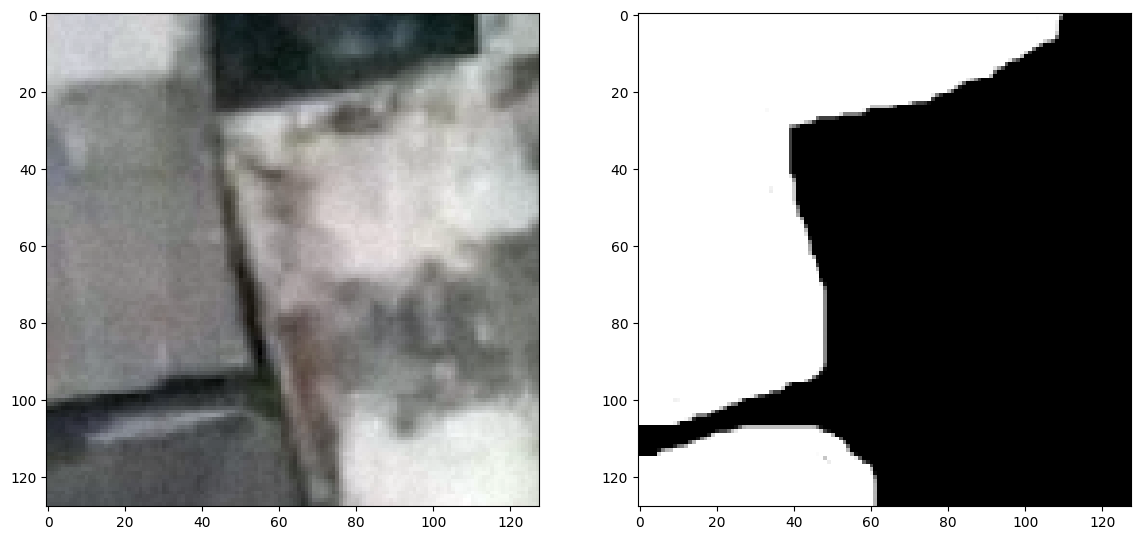

In [28]:
random_image_id = random.randint(0, len(image_dataset))


plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

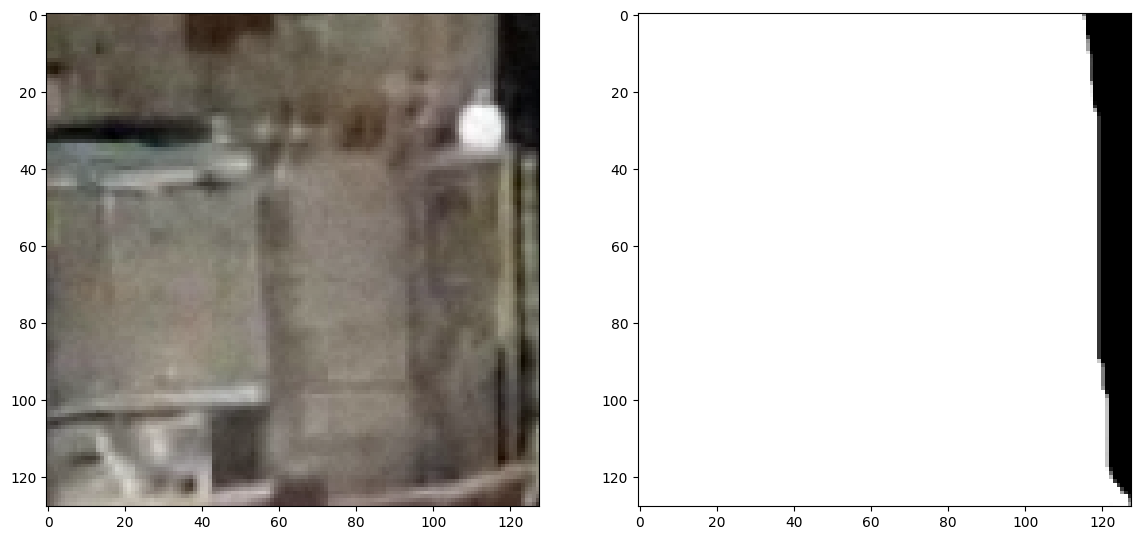

In [29]:
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[5610])
plt.subplot(122)
plt.imshow(mask_dataset[5610])

In [30]:
# Pastikan library sudah terinstal
!pip install scikit-image  # Install scikit-image jika belum terinstal

import os
import numpy as np
from skimage import io, img_as_ubyte  # Import tambahan buat konversi

# Parameter dataset
dataset_root_folder = '/kaggle/input/dense-and-sparse/TUGAS AKHIR'
dataset_name = "label_as_png"

# List untuk menyimpan dataset
labeled_data = []  # List untuk menyimpan mask dan labelnya

# Fungsi untuk membaca mask dari tile tertentu dan memberikan label
def process_tile(tile_id, label):
    masks_folder = f"{dataset_root_folder}/{dataset_name}/tile {tile_id}/masks/"
    print(f"Processing masks from: {masks_folder}")  # Debug: Print folder path

    tile_masks = []  # List untuk menyimpan mask dari tile tertentu
    for filename in os.listdir(masks_folder):
        print(f"Processing file: {filename}")  # Debug: Print nama file yang ditemukan
        mask_path = os.path.join(masks_folder, filename)  # Buat path lengkap ke file

        # Baca gambar dan pastikan grayscale
        mask = io.imread(mask_path, as_gray=True) 
        mask = img_as_ubyte(mask)  
        mask = np.where(mask > 1, 1, 0)  # Binarisasi mask 
        

        tile_masks.append((mask, label))  # Simpan mask dan label dalam tuple
    return tile_masks

# Proses tile 1 untuk bangunan padat
dense_building_data = process_tile(tile_id=1, label="Dense Building")

# Proses tile 2 untuk bangunan tidak padat
sparse_building_data = process_tile(tile_id=2, label="Sparse Building")

# Gabungkan data dari kedua tile
labeled_data.extend(dense_building_data)
labeled_data.extend(sparse_building_data)

# Debug: Print jumlah dataset yang dihasilkan
print(f"Jumlah dataset: {len(labeled_data)}")
print(f"Contoh data: {labeled_data[:2]}")  # Print contoh 2 data pertama

Processing masks from: /kaggle/input/dense-and-sparse/TUGAS AKHIR/label_as_png/tile 1/masks/
Processing file: label_image_517.png
Processing file: label_image_198.png
Processing file: label_image_437.png
Processing file: label_image_87.png
Processing file: label_image_238.png
Processing file: label_image_93.png
Processing file: label_image_906.png
Processing file: label_image_466.png
Processing file: label_image_347.png
Processing file: label_image_19.png
Processing file: label_image_265.png
Processing file: label_image_951.png
Processing file: label_image_771.png
Processing file: label_image_544.png
Processing file: label_image_120.png
Processing file: label_image_586.png
Processing file: label_image_747.png
Processing file: label_image_433.png
Processing file: label_image_957.png
Processing file: label_image_970.png
Processing file: label_image_145.png
Processing file: label_image_344.png
Processing file: label_image_789.png
Processing file: label_image_15.png
Processing file: label_

In [31]:
mask_dataset.shape[0]

5643

In [32]:
label = individual_patched_mask

In [33]:
def rgb_to_label(labeled_data):
    label_segment = np.zeros(label.shape, dtype=np.uint8)
    print(label_segment.shape)
    label_segment = 1
    return label_segment

In [34]:
def rgb_to_label(labeled_data):
    label_segment = np.zeros(labeled_data.shape[:2], dtype=np.uint8)
    label_segment[np.all(labeled_data == dense_building_data, axis=-1)] = 0  
    label_segment[np.all(labeled_data == sparse_building_data, axis=-1)] = 1 
    #print(label_segment)
    label_segment = label_segment[:,:,0]
    #print(label_segment)
    return label_segment

In [35]:
def rgb_to_label(labeled_data):
    label_segment = np.zeros(labeled_data.shape[:2], dtype=np.uint8)
    label_segment[np.all(labeled_data == dense_building_data, axis=-1)] = 0  
    label_segment[np.all(labeled_data == sparse_building_data, axis=-1)] = 1 
    return label_segment

In [36]:
import numpy as np

# Definisi warna RGB untuk setiap kategori
dense_Building = np.array([255, 255, 255])   
sparse_Building = np.array([0, 0, 0])  

def rgb_to_label(labeled_data):
    labeled_data = labeled_data.astype(np.uint8)
    """Mengonversi gambar mask RGB menjadi label biner (0 dan 1)."""
    label_segment = np.zeros(labeled_data.shape, dtype=np.uint8)  
    
    # Bandingkan piksel dengan warna yang sudah didefinisikan
    label_segment[np.all(labeled_data == dense_Building, axis=-1)] = 0  
    label_segment[np.all(labeled_data == sparse_Building, axis=-1)] = 1 
    #print(label_segment)
    label_segment = label_segment[:,:,0]
    #print(label_segment)
    return label_segment

In [37]:
labels = []
for i in range(mask_dataset.shape[0]):
    labeled_data = rgb_to_label (mask_dataset[i])
    labels.append(labeled_data)

In [38]:
print(len(labels))

5643


In [39]:
labels = np.array(labels)

In [40]:
labels[0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=uint8)

In [41]:
labels = np.expand_dims(labels, axis=3)

In [42]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]],

       [[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]],

       [[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)

In [43]:
np.unique(labels)

array([0, 1], dtype=uint8)

In [44]:
print("Total unique labels based on masks"),(np.unique(labels))

Total unique labels based on masks


(None, array([0, 1], dtype=uint8))

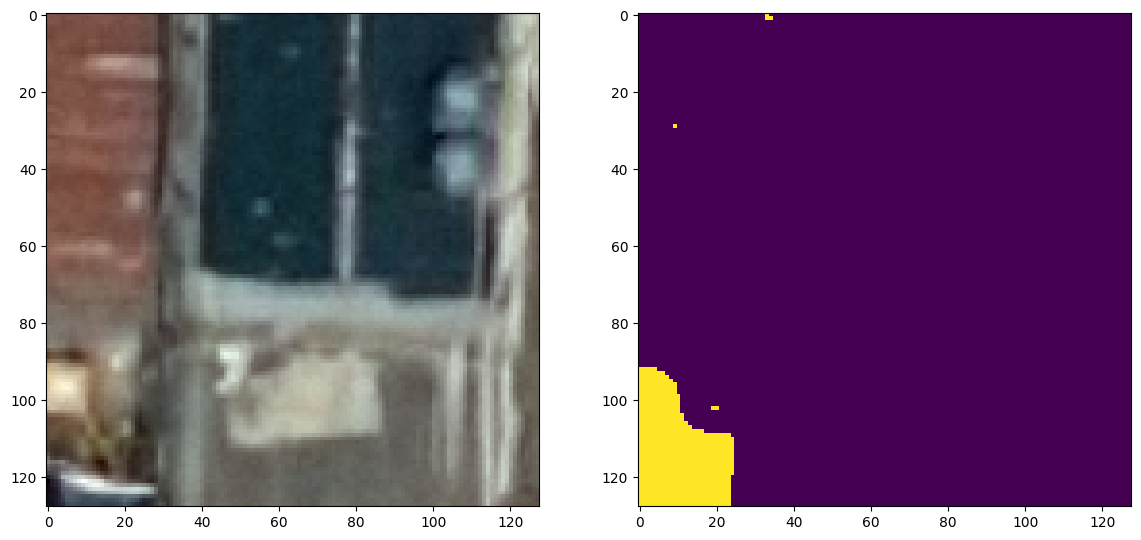

In [45]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(image_dataset[random_image_id].squeeze())
plt.subplot(1,2,2)
#plt.imshow(mask_dataset[random_image_id].squeeze())
plt.imshow(labels[random_image_id][:,:,0])

In [46]:
labels[0][:,:,0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=uint8)

In [47]:
total_classes = len(np.unique(labels))

In [48]:
total_classes

2

In [49]:
from tensorflow.keras.utils import to_categorical

In [50]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [51]:
labels_categorical_dataset.shape

(5643, 128, 128, 2)

In [104]:
master_training_dataset = image_dataset

In [105]:
master_training_dataset.shape

(5643, 128, 128, 3)

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
print(master_training_dataset.shape)
print(labels_categorical_dataset.shape)

(5643, 128, 128, 3)
(5643, 128, 128, 2)


In [108]:
x_train, x_test, y_train, y_test = train_test_split(master_training_dataset, labels_categorical_dataset, test_size=0.10, random_state=100 )

In [109]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5078, 128, 128, 3)
(565, 128, 128, 3)
(5078, 128, 128, 2)
(565, 128, 128, 2)


In [110]:
image_height = x_train.shape[1]
image_width = x_train.shape[2]
image_channels = x_train.shape[3]
total_classes = y_train.shape[3]

In [111]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

128
128
3
2


In [112]:
!pip install -U segmentation-models

In [113]:
from keras.models import Model
from keras.layers import Input,Conv2D,MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [64]:
from keras import backend as K

In [114]:
def jaccard_coef(y_true, y_pred):
    y_true_flatten = K.flatten(y_true)
    y_pred_flatten = K.flatten(y_pred)
    intersection = K.sum(y_true_flatten * y_pred_flatten)
    final_coef_value = intersection + 1.0 / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
    return final_coef_value

In [115]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate
)

def multi_unet_model(n_classes=2, image_height=128, image_width=128, image_channels=3):
    inputs = Input((image_height, image_width, image_channels))

    # Downsampling
    c1 = Conv2D(8, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(inputs)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(8, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    c5 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

    # Upsampling
    u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same")(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

    u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding="same")(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

    u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding="same")(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

    u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding="same")(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(8, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(8, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

    outputs = Conv2D(n_classes, (1, 1), activation="softmax")(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

In [116]:
metrics = ["accuracy", jaccard_coef]

In [117]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

128
128
3
2


In [118]:
def get_deep_learning_model():
    return multi_unet_model(n_classes=total_classes, 
                            image_height=image_height, 
                            image_width=image_width, 
                            image_channels=image_channels)

In [119]:
model = get_deep_learning_model()

In [120]:
model.get_config()

{'name': 'functional',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 128, 128, 3),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None,
   'name': 'input_layer',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'filters': 8,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'clas

Generating Loss Function

In [123]:
weights = [0.5,0.5]

In [130]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
import segmentation_models as sm

In [127]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [128]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [129]:
total_loss = dice_loss + (1 * focal_loss)

In [131]:
import tensorflow as tf

In [132]:
tf.keras.backend.clear_session()

In [133]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [134]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 8)    │            224 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128, 128, 8)    │              0 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 8)    │            584 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 8)      │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 16)     │          1,168 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 64, 64, 16)     │              0 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 16)     │          2,320 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 16)     │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 32)     │          4,640 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 32, 32, 32)     │              0 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 32, 32, 32)     │          9,248 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 16, 16, 32)     │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 16, 16, 64)     │         18,496 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 16, 16, 64)     │              0 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 16, 16, 64)     │         36,928 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 8, 8, 64)       │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)    

 Total params: 485,826 (1.85 MB)

 Trainable params: 485,826 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

In [135]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)
datagen.fit(x_train)

In [137]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callback untuk Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=False)

# Callback untuk Reduce Learning Rate saat stagnan
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Training Model dengan callback
model_history = model.fit(
    x_train, y_train,
    batch_size=16,
    verbose=1,
    epochs=50,
    validation_data=(x_test, y_test),
    shuffle=True,  # ⬅️ Pastikan data tidak urut tetap
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 36s 66ms/step - accuracy: 0.6314 - jaccard_coef: 142231.5781 - loss: 0.7675 - val_accuracy: 0.6720 - val_jaccard_coef: 148742.3906 - val_loss: 0.7474 - learning_rate: 0.0010
Epoch 2/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.6689 - jaccard_coef: 155011.1875 - loss: 0.7493 - val_accuracy: 0.6799 - val_jaccard_coef: 143549.5625 - val_loss: 0.7512 - learning_rate: 0.0010
Epoch 3/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.6654 - jaccard_coef: 154251.2812 - loss: 0.7492 - val_accuracy: 0.6909 - val_jaccard_coef: 159153.2812 - val_loss: 0.7335 - learning_rate: 0.0010
Epoch 4/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.6787 - jaccard_coef: 159714.2656 - loss: 0.7404 - val_accuracy: 0.6927 - val_jaccard_coef: 155895.5781 - val_loss: 0.7360 - learning_rate: 0.0010
Epoch 5/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.6785 - jaccard_coef: 159407.0312 - loss: 0.7408 - val_accuracy: 0.6971 - val_jac

In [138]:
history_a = model_history

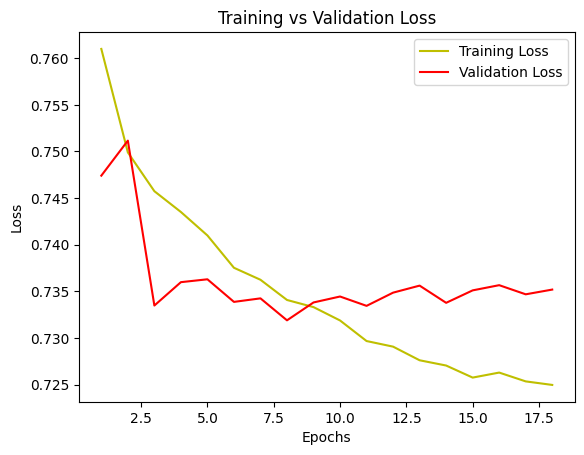

In [139]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [140]:
val_loss

[0.7474028468132019,
 0.7511569857597351,
 0.7334762215614319,
 0.7359815835952759,
 0.7362898588180542,
 0.7338665127754211,
 0.7342448830604553,
 0.731889545917511,
 0.7338062524795532,
 0.7344432473182678,
 0.7334408164024353,
 0.7348573803901672,
 0.7356112599372864,
 0.7337667346000671,
 0.7351016402244568,
 0.7356585264205933,
 0.7346789240837097,
 0.7351865172386169]

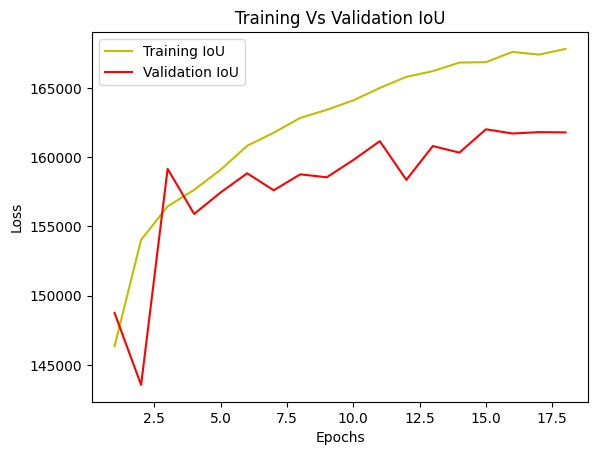

In [143]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [144]:
model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 318}

In [145]:
y_pred = model.predict(x_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step


In [146]:
len(y_pred)

565

In [147]:
y_pred

array([[[[0.43336025, 0.5666398 ],
         [0.41135034, 0.5886497 ],
         [0.4161308 , 0.58386916],
         ...,
         [0.5750572 , 0.42494276],
         [0.5857    , 0.41430008],
         [0.5682051 , 0.43179482]],

        [[0.4093417 , 0.5906583 ],
         [0.3886404 , 0.6113596 ],
         [0.4137502 , 0.5862498 ],
         ...,
         [0.62224317, 0.3777569 ],
         [0.61957425, 0.38042575],
         [0.6052592 , 0.3947408 ]],

        [[0.42484877, 0.57515126],
         [0.41909721, 0.5809028 ],
         [0.44347048, 0.5565296 ],
         ...,
         [0.6629573 , 0.3370427 ],
         [0.66783905, 0.33216095],
         [0.63655114, 0.36344886]],

        ...,

        [[0.61854744, 0.38145256],
         [0.65963995, 0.34036008],
         [0.7004969 , 0.2995031 ],
         ...,
         [0.29151404, 0.7084859 ],
         [0.2909805 , 0.7090195 ],
         [0.34276313, 0.65723693]],

        [[0.6218648 , 0.37813523],
         [0.6474607 , 0.35253927],
         [0.

In [148]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [149]:
len(y_pred_argmax)

565

In [150]:
y_pred_argmax

array([[[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 1, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [151]:
y_test_argmax = np.argmax(y_pred, axis=3)

In [152]:
y_test_argmax

array([[[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 1, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [154]:
import random

In [155]:
test_image_number = random.randint(0, len(x_test))

test_image = x_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


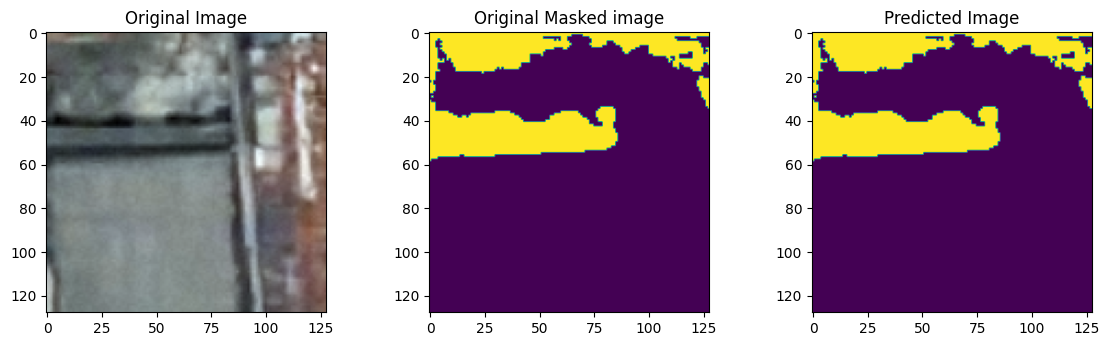

In [156]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [157]:
model.save("semantic_segmentation_dense_and_sparse_building.h5")

In [158]:
!ls -lah 

total 5.8M
drwxr-xr-x 3 root root 4.0K Mar  3 16:16 .
drwxr-xr-x 6 root root 4.0K Mar  3 15:50 ..
-rw-r--r-- 1 root root 5.8M Mar  3 16:16 semantic_segmentation_dense_and_sparse_building.h5
drwxr-xr-x 2 root root 4.0K Mar  3 15:50 .virtual_documents
